# 1. Pandas

## 1.1 Pandas介绍
Pandas 是 Python 语言的一个扩展程序库，用于数据分析。    
Pandas 一个强大的分析结构化数据的工具集，基础是 Numpy（提供高性能的矩阵运算）。    

Pandas 可以从各种文件格式比如 CSV、JSON、SQL、Microsoft Excel 导入数据。   
Pandas 可以对各种数据进行运算操作，比如归并、再成形、选择，还有数据清洗和数据加工特征。   
Pandas 广泛应用在学术、金融、统计学等各个数据分析领域。   
    
参考：    
http://c.biancheng.net/pandas/
https://www.runoob.com/pandas/pandas-tutorial.html

## 1.2 数据结构
1. Series 是一种类似于一维数组的对象，它由一组数据（各种Numpy数据类型）以及一组与之相关的数据标签（即索引）组成。     
2. DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。

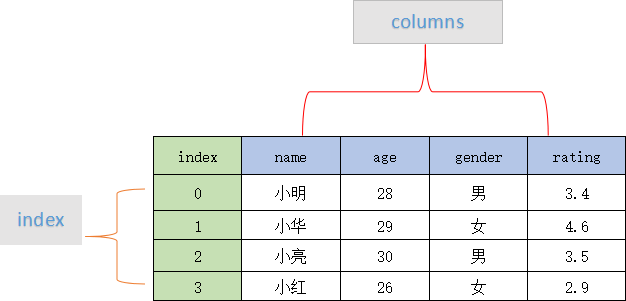

### 1.2.1 Series
关于 创建对象时 的index   
1. 如果没有指定索引，索引值就从 0 开始，即可以根据索引值读取数据
2. 可以指定索引值
3. 也可以使用 key/value 对象，类似字典来创建 Series

In [55]:
import pandas as pd
a = ["Google", "Runoob", "Wiki"]
myvar = pd.Series(a, index = ["x", "y", "z"])
print(myvar)
print(myvar["y"])

x    Google
y    Runoob
z      Wiki
dtype: object
Runoob


访问Series数据
1. 位置索引访问
这种访问方式与 ndarray 和 list 相同，使用元素自身的下标进行访问。我们知道数组的索引计数从 0 开始，这表示第一个元素存储在第 0 个索引位置上，以此类推，就可以获得 Series 序列中的每个元素。也可以通过切片的方式访问 Series 序列中的数据。
2. Series 类似于固定大小的 dict，把 index 中的索引标签当做 key，而把 Series 序列中的元素值当做 value，然后通过 index 索引标签来访问或者修改元素值。

In [59]:
myvar[0:2]

x    Google
y    Runoob
dtype: object

### 1.2.2 DataFrame


In [10]:
# 创建对象
# 思考：如果data是一个Json格式数据怎么办？
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
df

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


In [17]:
# 索引问题
df = pd.DataFrame(data, index=['rank1','rank2','rank3'])
df

,0,1
rank1,Alex,10
rank2,Bob,12
rank3,Clarke,13


## 1.3 读取数据文件

In [49]:
import pandas as pd
df = pd.read_csv('./data/nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [50]:
# tail(),head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


## 1.4 数据处理

### 1.4.1 列索引操作DataFrame

In [26]:
data = {'one': pd.Series([1, 2, 3], index = ['a', 'b', 'c']),
   'two': pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [25]:
# 列标签——>增删改查
# 使用df['列']=值，插入新的数据列
df['three'] = pd.Series([10,20,30],index=['a','b','c'])
print("--------增--------")
print(df)
# 将已经存在的数据列做相加运算
df['four'] = df['one'] + df['three']
print("--------改--------")
print(df)
# 使用del删除
del df['one']
print("--------删--------")
print(df)

--------增--------
   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN
--------改--------
   one  two  three  four
a  1.0    1   10.0  11.0
b  2.0    2   20.0  22.0
c  3.0    3   30.0  33.0
d  NaN    4    NaN   NaN
--------删--------
   two  three  four
a    1   10.0  11.0
b    2   20.0  22.0
c    3   30.0  33.0
d    4    NaN   NaN


其他常用方法：
1. df.insert(1,column='score',value=[91,90,75]) 数值1代表插入到columns列表的索引位置。
2. 通过 del 和 pop() 都能够删除 DataFrame 中的数据列。

### 1.4.2 行索引操作DataFrame

1. 标签索引选取：可以将行标签传递给 loc 函数，来选取数据。    
注意：loc 允许接两个参数分别是行和列，参数之间需要使用“逗号”隔开，但该函数只能接收标签索引    
df.iloc[] 只能使用整数索引，不能使用标签索引，通过整数索引切片选择数据时，前闭后开(不包含边界结束值)。
2. 整数索引选取：通过将数据行所在的索引位置传递给 iloc 函数，也可以实现数据行选取。
3. 切片操作多行选取：可以使用切片的方式同时选取多行。
4. 添加数据行：使用 append() 函数，可以将新的数据行添加到 DataFrame 中，该函数会在行末追加数据行。
5. 删除数据行：可以使用行索引标签，从 DataFrame 中删除某一行数据。如果索引标签存在重复，那么它们将被一起删除。


In [33]:
data = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
# 左闭右开
print(df[2:4])

   one  two
c  3.0    3
d  NaN    4


### 1.4.3 数据清洗

1. 清洗空值
2. fillna() 方法来替换一些空字段  
替换空单元格的常用方法是计算列的均值、中位数值或众数。Pandas使用 mean()、median() 和 mode() 方法计算列的均值（所有值加起来的平均值）、中位数值（排序后排在中间的数）和众数（出现频率最高的数）。   
3. 清洗格式错误数据
4. 清洗错误数据

In [37]:
# 如果我们要删除包含空字段的行，可以使用 dropna() 方法
# 语法格式：DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
# 可以指定空数据类型
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('property-data.csv', na_values = missing_values)

print (df['NUM_BEDROOMS'])
print (df['NUM_BEDROOMS'].isnull())

### 1.4.4 函数操作

统计函数    
Pandas 的本质是统计学原理在计算机领域的一种应用实现，通过编程的方式达到分析、描述数据的目的。而统计函数则是统计学中用于计算和分析数据的一种工具。在数据分析的过程中，使用统计函数有助于我们理解和分析数据。本节将学习几个常见的统计函数，比如百分比函数、协方差函数、相关系数等。

 
窗口函数   
为了能更好地处理数值型数据，Pandas 提供了几种窗口函数，比如移动函数（rolling）、扩展函数（expanding）和指数加权函数（ewm）。
窗口函数应用场景非常多。举一个简单的例子：现在有 10 天的销售额，而您想每 3 天求一次销售总和，也就说第五天的销售额等于（第三天 + 第四天 + 第五天）的销售额之和，此时窗口函数就派上用场了。

聚合函数   
聚合函数指的是对一组数据求总和、最大值、最小值以及平均值的操作

In [39]:
# 对多列数据聚合
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(5, 4),index = pd.date_range('12/14/2020', periods=5),columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2020-12-14,1.314879,-0.513290,-1.286504,-0.206495
2020-12-15,-0.400095,-0.129834,0.381195,0.571482
2020-12-16,-0.289743,1.082096,1.189137,-0.359503
2020-12-17,0.228124,0.469990,-0.395959,0.037210
2020-12-18,-1.774345,-0.224784,0.205429,0.991809


In [41]:
# 窗口大小为3，min_periods 最小观测值为1
r = df.rolling(window=3,min_periods=1)
#对 A/B 两列聚合
r['A','B'].aggregate(np.sum)

,A,B
2020-12-14,1.314879,-0.513290
2020-12-15,0.914785,-0.643124
2020-12-16,0.625042,0.438973
2020-12-17,-0.461714,1.422253
2020-12-18,-1.835964,1.327303


分组操作    
根据某一列（或多列）标签把数据划分为不同的组别，然后再对其进行数据分析。比如，某网站对注册用户的性别或者年龄等进行分组，从而研究出网站用户的画像（特点）。    



在划分出来的组（group）上应用一些统计函数，从而达到数据分析的目的，比如对分组数据进行聚合、转换，或者过滤。这个过程主要包含以下三步：   
1. 拆分（Spliting）：表示对数据进行分组；
2. 应用（Applying）：对分组数据应用聚合函数，进行相应计算；
3. 合并（Combining）：最后汇总计算结果。



In [46]:
import pandas as pd 
import numpy as np 
data = {'name': ['John', 'Helen', 'John', 'Helen'], 
   'score': [82, 98, 91, 87], 
   'option_course': ['C#','Python','Java','C']} 
df = pd.DataFrame(data)
df

,name,score,option_course
0,John,82,C#
1,Helen,98,Python
2,John,91,Java
3,Helen,87,C


In [47]:
grouped=df.groupby('name')
# 应用一个聚合函数求均值
(grouped['score']).agg(np.mean)

name
Helen    92.5
John     86.5
Name: score, dtype: float64

In [54]:
df=pd.read_excel("./data/nba.xls")
df

FileNotFoundError: [Errno 2] No such file or directory: './data/nba.xls'